In [15]:
%matplotlib inline
import sympy as sym
sym.init_printing()
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.grid()
    plt.show()

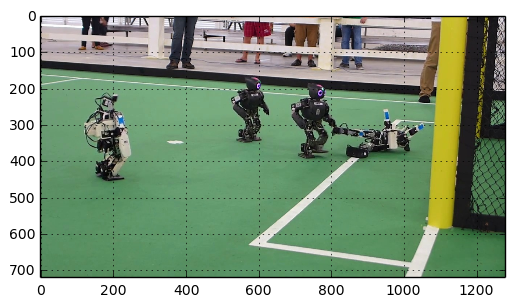

In [16]:
image = cv2.imread("/home/vinicius/Dropbox/Projeto Mestrado/Codigos/RoboFEI-HT_Debug/AI/Vision/Workbench/iPython/Competicao.jpg")
plot(image)

In [3]:
points = [
    ["L", 0.98, [1156, 1824]],
    ["T", 0.98, [48, 2244]],
    ["T", 0.98, [4080, 1144]],
    ["X", 0.98, [2588, 1028]],
#     ["X", 0.98, [1796, 968]],
    ["P", 0.98, [832, 1232]],
]

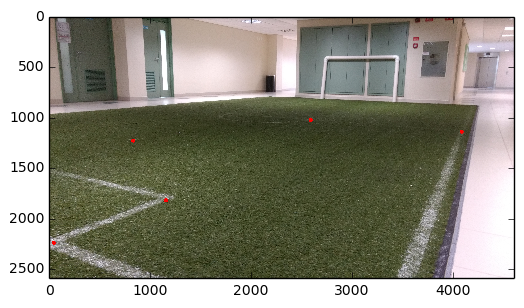

In [4]:
imagepoint = image.copy()
for __, __, p in points:
    cv2.circle(imagepoint, tuple(p), 20, (0,0,255), -1)
plot(imagepoint)

In [5]:
points[0].append([1.7, 6.2, 0])
points[1].append([0.7, 6.2, 0])
points[2].append([5.2, 6.7, 0])
points[3].append([5.2, 2.95, 0])
points[4].append([2.8, 10.4, 0])
points

[['L', 0.98, [1156, 1824], [1.7, 6.2, 0]],
 ['T', 0.98, [48, 2244], [0.7, 6.2, 0]],
 ['T', 0.98, [4080, 1144], [5.2, 6.7, 0]],
 ['X', 0.98, [2588, 1028], [5.2, 2.95, 0]],
 ['P', 0.98, [832, 1232], [2.8, 10.4, 0]]]

In [6]:
points.append(["E", 0.5, [(points[0][2][0]+points[1][2][0])/2, (points[0][2][1]+points[1][2][1])/2], [(points[0][3][0]+points[1][3][0])/2, (points[0][3][1]+points[1][3][1])/2, 0]])
points

[['L', 0.98, [1156, 1824], [1.7, 6.2, 0]],
 ['T', 0.98, [48, 2244], [0.7, 6.2, 0]],
 ['T', 0.98, [4080, 1144], [5.2, 6.7, 0]],
 ['X', 0.98, [2588, 1028], [5.2, 2.95, 0]],
 ['P', 0.98, [832, 1232], [2.8, 10.4, 0]],
 ['E', 0.5, [602, 2034], [1.2, 6.2, 0]]]

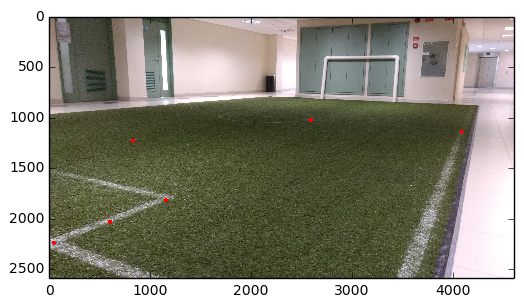

In [7]:
imagepoint = image.copy()
for __, __, p, __ in points:
    cv2.circle(imagepoint, tuple(p), 20, (0,0,255), -1)
plot(imagepoint)

In [8]:
X, Y, Z = sym.symbols("X Y Z")
x, y, z = sym.symbols("x y z")
a = []
for i in xrange(1,5):
    for j in xrange(1,5):
        a.append(sym.symbols("a_{"+str(i)+str(j)+"}"))
a = np.array(a).reshape([4,4])

ch = []
for i in xrange(1,5):
    ch.append(sym.symbols("c_{h"+str(i)+"}"))
ch = np.array(ch).reshape([4,1])


P = sym.Matrix([X, Y, Z, 1])
p = sym.Matrix(ch)
a, ch

(array([[a_{11}, a_{12}, a_{13}, a_{14}],
        [a_{21}, a_{22}, a_{23}, a_{24}],
        [a_{31}, a_{32}, a_{33}, a_{34}],
        [a_{41}, a_{42}, a_{43}, a_{44}]], dtype=object), array([[c_{h1}],
        [c_{h2}],
        [c_{h3}],
        [c_{h4}]], dtype=object))

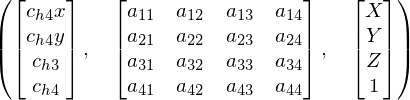

In [9]:
p = p.subs([
    [ch[0,0], x*ch[3,0]],
    [ch[1,0], y*ch[3,0]],
])
M = sym.Matrix(a)
p, M, P

In [10]:
(M*P - p).subs([
    [ch[3,0], (M*P)[3]],
    [Z, 0]
])[:2]

In [12]:
equacoes = []
for __, __, [px, py], [PX, PY, PZ], in points:
    eq1, eq2 = (M*P).subs([
            [ch[3,0], (M*P)[3]],
            [x, px],
            [y, py],
            [X, PX],
            [Y, PY],
            [Z, 0],
        ])[:2]
    req1, req2 = p.subs([
            [ch[3,0], (M*P)[3]],
            [x, px],
            [y, py],
            [X, PX],
            [Y, PY],
            [Z, 0],
        ])[:2]
    equacoes.extend([sym.Eq(eq1, req1), sym.Eq(eq2, req2)])
equacoes

In [13]:
sym.linsolve(equacoes, np.reshape(a, (16)).tolist())